In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 14
plt.rcParams['text.usetex'] = True

# Armchair

In [80]:
def make_NAGNR_hamiltonian(N, alpha, beta, k):
    # Statical
    H = np.identity(2*N, dtype = complex) * alpha

    for i in range(2*N):
        for j in range(2*N):
            if j == i+1 or j == i-1:
                H[i,j] = beta
    
    # Dynamical
    
    counter = 0

    for i in range(2*N):
        for j in range(2*N):
            if i+j == (2*N)-1:
                counter = counter + 1
                if counter % 2 != 0:
                    H[i,j] = beta
                else:
                    if counter > N:
                        H[i,j] = beta*np.exp(+1j*k*a)
                    else:
                        H[i,j] = beta*np.exp(-1j*k*a)
    return H

In [81]:
def diagonalize(N, hamiltonian_function):
    k_array = np.linspace(-np.pi/a, np.pi/a, 51)
    E_array = np.zeros((len(k_array), 2*N))
    
    for idx, k in enumerate(k_array):
        H = hamiltonian_function(N, alpha, beta, k)
        E_array[idx] = np.linalg.eigvalsh(H)
    
    return E_array

In [87]:
alpha = 0.0
beta = 2.8
a = 1.0

k_array = np.linspace(-np.pi/a, np.pi/a, 51)

E_A9 = diagonalize(N=9, hamiltonian_function=make_NAGNR_hamiltonian)
E_A10 = diagonalize(N=10, hamiltonian_function=make_NAGNR_hamiltonian)
E_A11 = diagonalize(N=11, hamiltonian_function=make_NAGNR_hamiltonian)

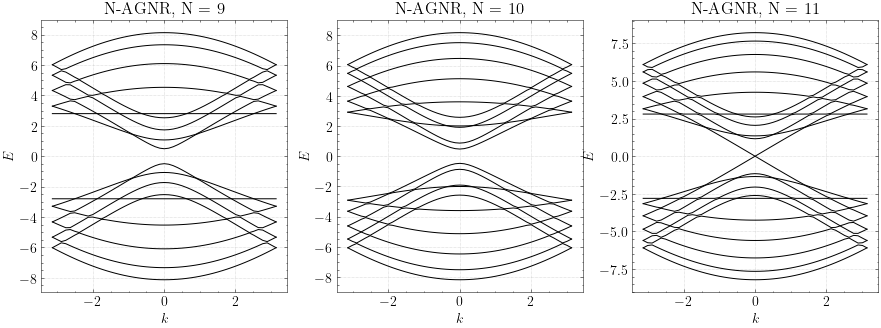

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(k_array, E_A9, c='k')
plt.xlabel('$k$')
plt.ylabel('$E$')
plt.title(f'N-AGNR, N = 9')
plt.grid(ls=':')

plt.subplot(1,3,2)
plt.plot(k_array, E_A10, c='k')
plt.xlabel('$k$')
plt.ylabel('$E$')
plt.title(f'N-AGNR, N = 10')
plt.grid(ls=':')

plt.subplot(1,3,3)
plt.plot(k_array, E_A11, c='k')
plt.xlabel('$k$')
plt.ylabel('$E$')
plt.title(f'N-AGNR, N = 11')
plt.grid(ls=':')

plt.show()

# Zigzag

In [89]:
def make_NZGNR_hamiltonian(N, alpha, beta, k):
    H = np.identity(2*N, dtype=complex) * alpha

    sgn = 1.0
    for i in range(2*N):
        for j in range(2*N):
            if j == i+1:
                if j % 2 == 0:
                    H[i,j] = beta
                else:
                    H[i,j] = beta*(1 + np.exp(sgn*1j*k*a))

            elif j == i-1:
                if i % 2 == 0:
                    H[i,j] = beta
                else:
                    H[i,j] = beta*(1 + np.exp(sgn*1j*k*a))
                    sgn = sgn*(-1)
    return H

In [90]:
alpha = 0.0
beta = 2.8
a = 1.0

E_Z4 = diagonalize(N=4, hamiltonian_function=make_NZGNR_hamiltonian)
E_Z8 = diagonalize(N=8, hamiltonian_function=make_NZGNR_hamiltonian)
E_Z16 = diagonalize(N=16, hamiltonian_function=make_NZGNR_hamiltonian)

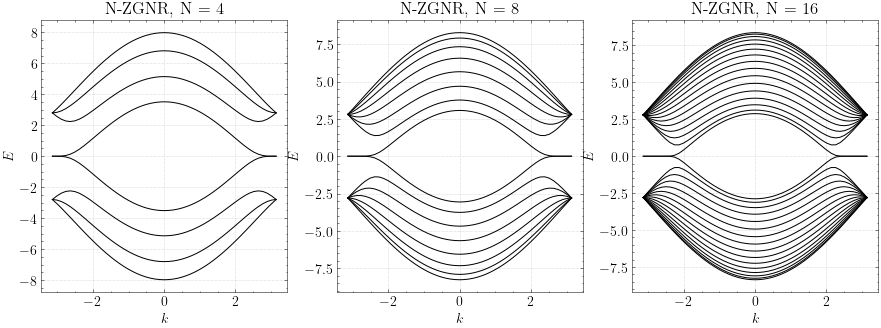

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(k_array, E_Z4, c='k')
plt.xlabel('$k$')
plt.ylabel('$E$')
plt.title(f'N-ZGNR, N = 4')
plt.grid(ls=':')

plt.subplot(1,3,2)
plt.plot(k_array, E_Z8, c='k')
plt.xlabel('$k$')
plt.ylabel('$E$')
plt.title(f'N-ZGNR, N = 8')
plt.grid(ls=':')

plt.subplot(1,3,3)
plt.plot(k_array, E_Z16, c='k')
plt.xlabel('$k$')
plt.ylabel('$E$')
plt.title(f'N-ZGNR, N = 16')
plt.grid(ls=':')

plt.show()